In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from risk_free_curve import risk_free_curve
from ConvertibleBondClass import ConvertibleBond
from AndersonBuffumPricer import AndersenBuffumPricer

ModuleNotFoundError: No module named 'risk_free_curve'

In [ ]:
#### Set up convertible bond and pricer

In [12]:
pricing_date = dt.datetime.strptime('2018/09/22', "%Y/%m/%d")

# construct risk free discount curve
rf_tenors = np.array([0.25, 0.5, 1, 2, 5, 10])
rf_zrates = np.array([2.367, 2.541, 2.769, 2.979, 3.076, 3.132])/100.
rf_curve = risk_free_curve(rf_tenors, rf_zrates)

# specific contract information of the convertible bond
contract_info = {
    'maturity_date' : dt.datetime.strptime('2023/10/21', "%Y/%m/%d"),
    'coupon_rate' : 7,
    'coupon_freq' : 2,
    'notional'    : 100,
    'conv_price'  : 100,
    'callable' : False,
    'puttable' : False,
    'softcall' : True,
    'softcall_start'   : dt.datetime.strptime('2020/10/22', "%Y/%m/%d"),
    'softcall_end'     : dt.datetime.strptime('2022/10/21', "%Y/%m/%d"),
    'softcall_barrier' : 80,
    'softcall_redempt' : 100,    
}

# model parameters for the jump diffusion model
model_params = {    
    'recovery_rate'         : 0.4,
    'credit tenors'         : [1,5,10],
    'credit spread'         : [250,300,350],
    'equity_spot'           : 50,
    'equity_dividend_yield' : 0.02,
    'equity_flat_vol'       : 30,
    'eta'                   : 0.9, # percentage loss on equity upon jump to default
}

# set up the convertible bond object and pricer object
CB = ConvertibleBond(contract_info, model_params, rf_curve, p=1.0)
ABpricer = AndersenBuffumPricer(CB, pricing_date)

#### Price it and compute Greeks

In [14]:
pricer_output = {
    'price'          : ABpricer.price(),
    'eq_spot_delta'  : ABpricer.eq_spot_delta(),
    'eq_spot_gamma'  : ABpricer.eq_spot_gamma(),
    'eq_vega'        : ABpricer.eq_vega(),
}

pricer_output

{'eq_spot_delta': 0.2679641799386502,
 'eq_spot_gamma': 0.2773588872968302,
 'eq_vega': -0.032884938622970594,
 'price': 106.32368766427356}

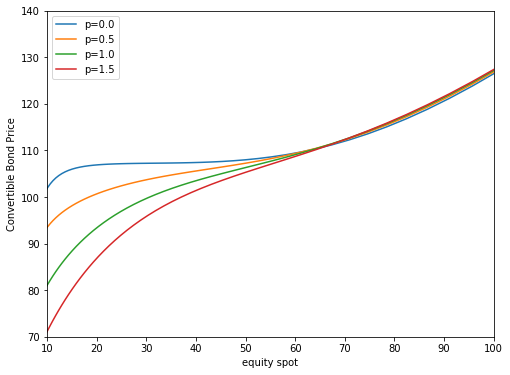

In [15]:
# show different CB pricing profiles for different choices of p

S = ABpricer.S_knots

ABpricer.reset_p(newp=0.0)
ABpricer.solve()
v01 = ABpricer.v_knots

ABpricer.reset_p(newp=0.5)
ABpricer.solve()
v05 = ABpricer.v_knots

ABpricer.reset_p(newp=1.0)
ABpricer.solve()
v10 = ABpricer.v_knots

ABpricer.reset_p(newp=1.5)
ABpricer.solve()
v15 = ABpricer.v_knots

plt.figure(figsize=(8,6))
plt.plot(S, v01, label='p=0.0')
plt.plot(S, v05, label='p=0.5')
plt.plot(S, v10, label='p=1.0')
plt.plot(S, v15, label='p=1.5')
plt.xlim(10,100)
plt.ylim(70,140)
plt.legend()
plt.xlabel('equity spot')
plt.ylabel('Convertible Bond Price')
plt.show()